In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
id_col = ['id']
cycle_col = ['cycle']
setting_cols = ['setting1', 'setting2', 'setting3']
sensor_cols = ['sensor' + str(i) for i in range(1, 22)]
rul_col = ['RUL']
header = id_col + cycle_col + setting_cols + sensor_cols #+ rul_col
header

['id',
 'cycle',
 'setting1',
 'setting2',
 'setting3',
 'sensor1',
 'sensor2',
 'sensor3',
 'sensor4',
 'sensor5',
 'sensor6',
 'sensor7',
 'sensor8',
 'sensor9',
 'sensor10',
 'sensor11',
 'sensor12',
 'sensor13',
 'sensor14',
 'sensor15',
 'sensor16',
 'sensor17',
 'sensor18',
 'sensor19',
 'sensor20',
 'sensor21']

In [8]:
def read_data(filename):

    train_df = pd.read_csv(f"./dataset/{filename}/train_{filename}.txt", sep=" ", header=None)
    train_df.drop(train_df.columns[[26, 27]], axis=1, inplace=True)
    train_df.columns = header

    # train_df = train_df.sort_values(["id", "cycle"])

    test_df = pd.read_csv(f"./dataset/{filename}/test_{filename}.txt", sep=" ", header=None)
    test_df.drop(test_df.columns[[26, 27]], axis=1, inplace=True)
    test_df.columns =header
    
    
    truth_df = pd.read_csv(f"./dataset/{filename}/RUL_{filename}.txt", sep=" ", header=None)
    truth_df.drop(truth_df.columns[[1]], axis=1, inplace=True)
    return train_df, test_df, truth_df

In [9]:
filename= "FD001"

In [10]:
train_df, test_df, truth_df = read_data(filename)

In [18]:
truth_df.columns = rul_col
truth_df

,RUL
0,112
1,98
2,69
3,82
4,91
...,...
95,137
96,82
97,59
98,117


In [12]:
test_df.columns[5:]

Index(['sensor1', 'sensor2', 'sensor3', 'sensor4', 'sensor5', 'sensor6',
       'sensor7', 'sensor8', 'sensor9', 'sensor10', 'sensor11', 'sensor12',
       'sensor13', 'sensor14', 'sensor15', 'sensor16', 'sensor17', 'sensor18',
       'sensor19', 'sensor20', 'sensor21'],
      dtype='object')

In [13]:
def plotSensorDataOfId(data, mcId):
    plt.figure(figsize=(30, 20))
    for i,header in enumerate(data.columns[5:]):
        sensor = 'sensor'+str(i+1)
        plt.subplot(10, 3, i+1).set_title(sensor)
        ssdata = data[data['id']==mcId]
        
        plt.plot(ssdata['cycle'], ssdata[header])
    plt.tight_layout()

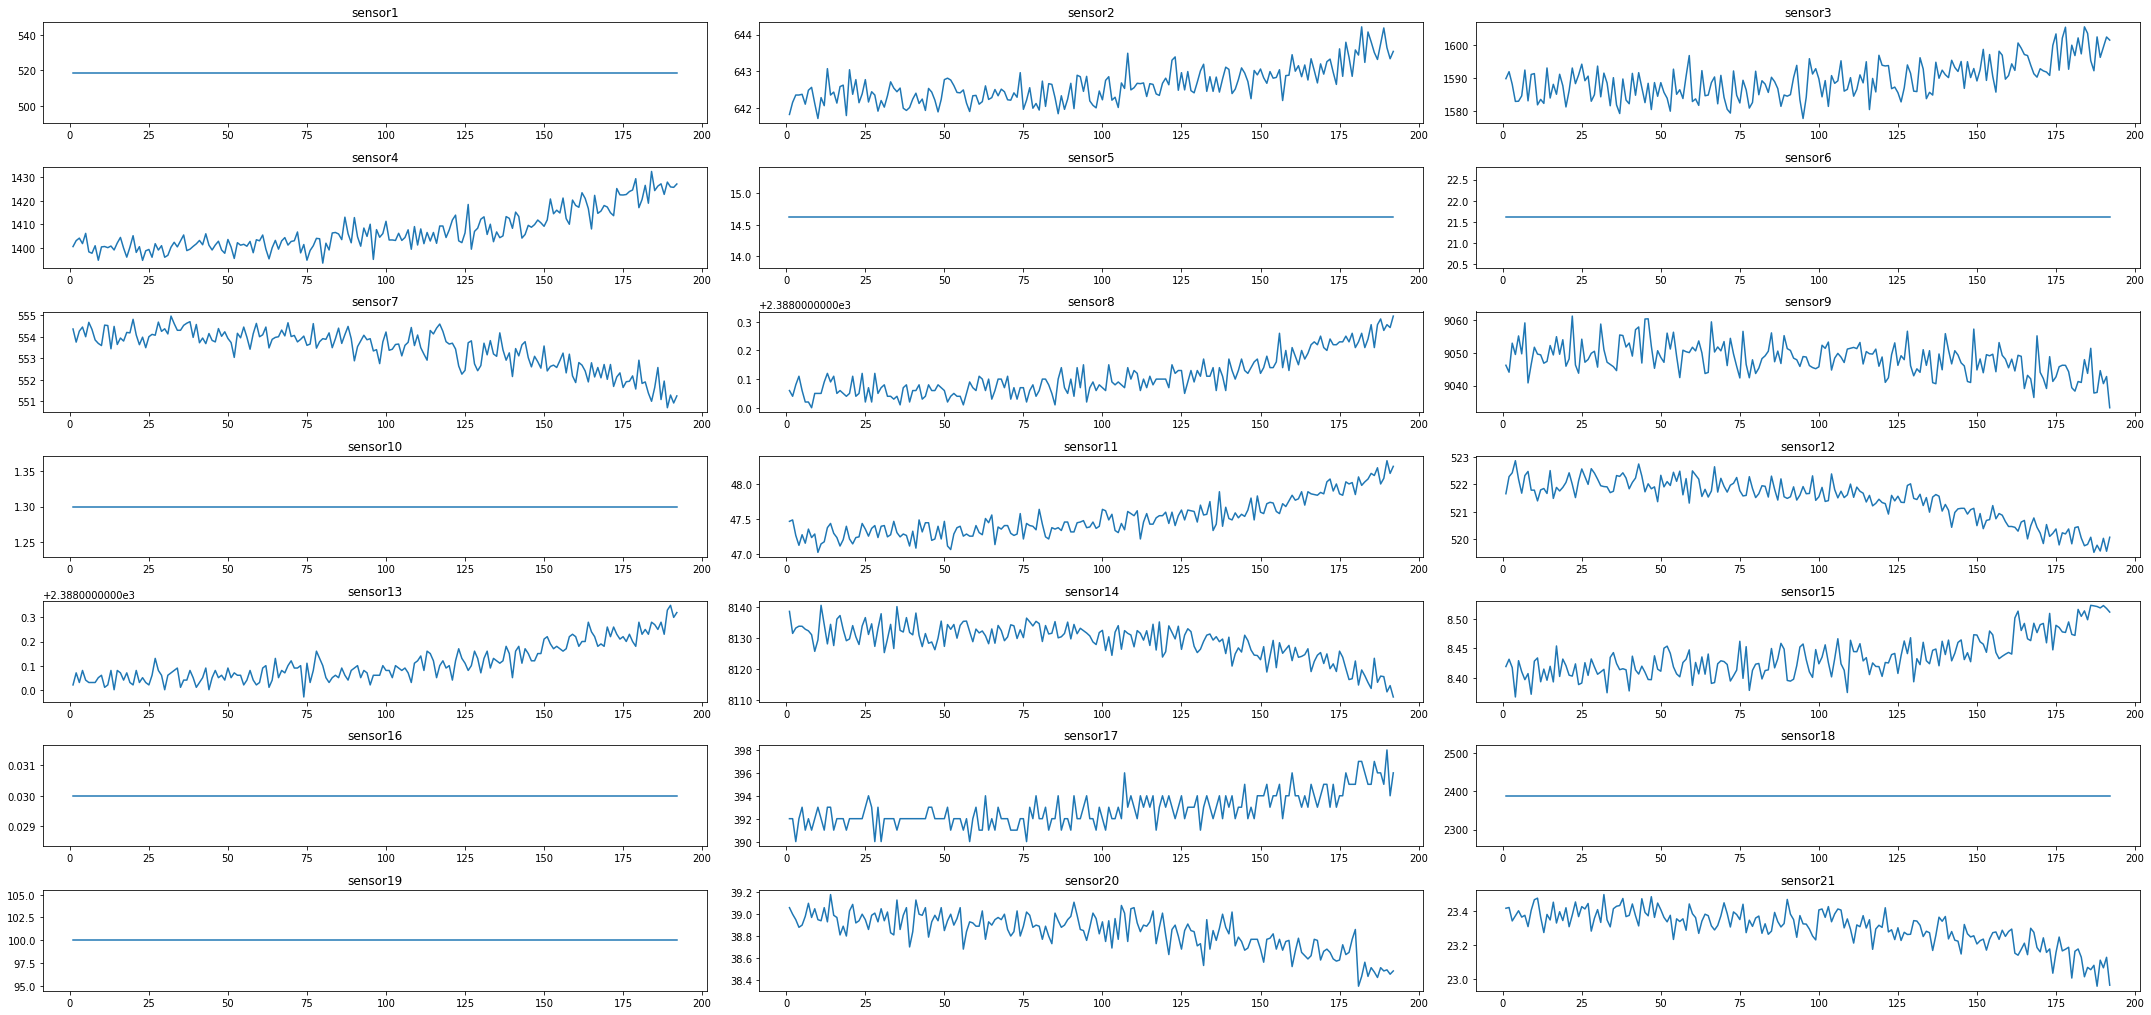

In [10]:
plotSensorDataOfId(train_df,1)

In [26]:
def plotDataDistribution(data):
    sensors = []
    plt.figure(figsize=(30, 10))
    for i,header in enumerate(data.columns[4:]):
        sensor = 'sensor'+str(i+1)
        if(len(data[header].unique())>1):
            sensors.append(sensor)
            plt.subplot(3, 10, i+1)
            sns.histplot(data[header])
    plt.tight_layout()
    # return sensors

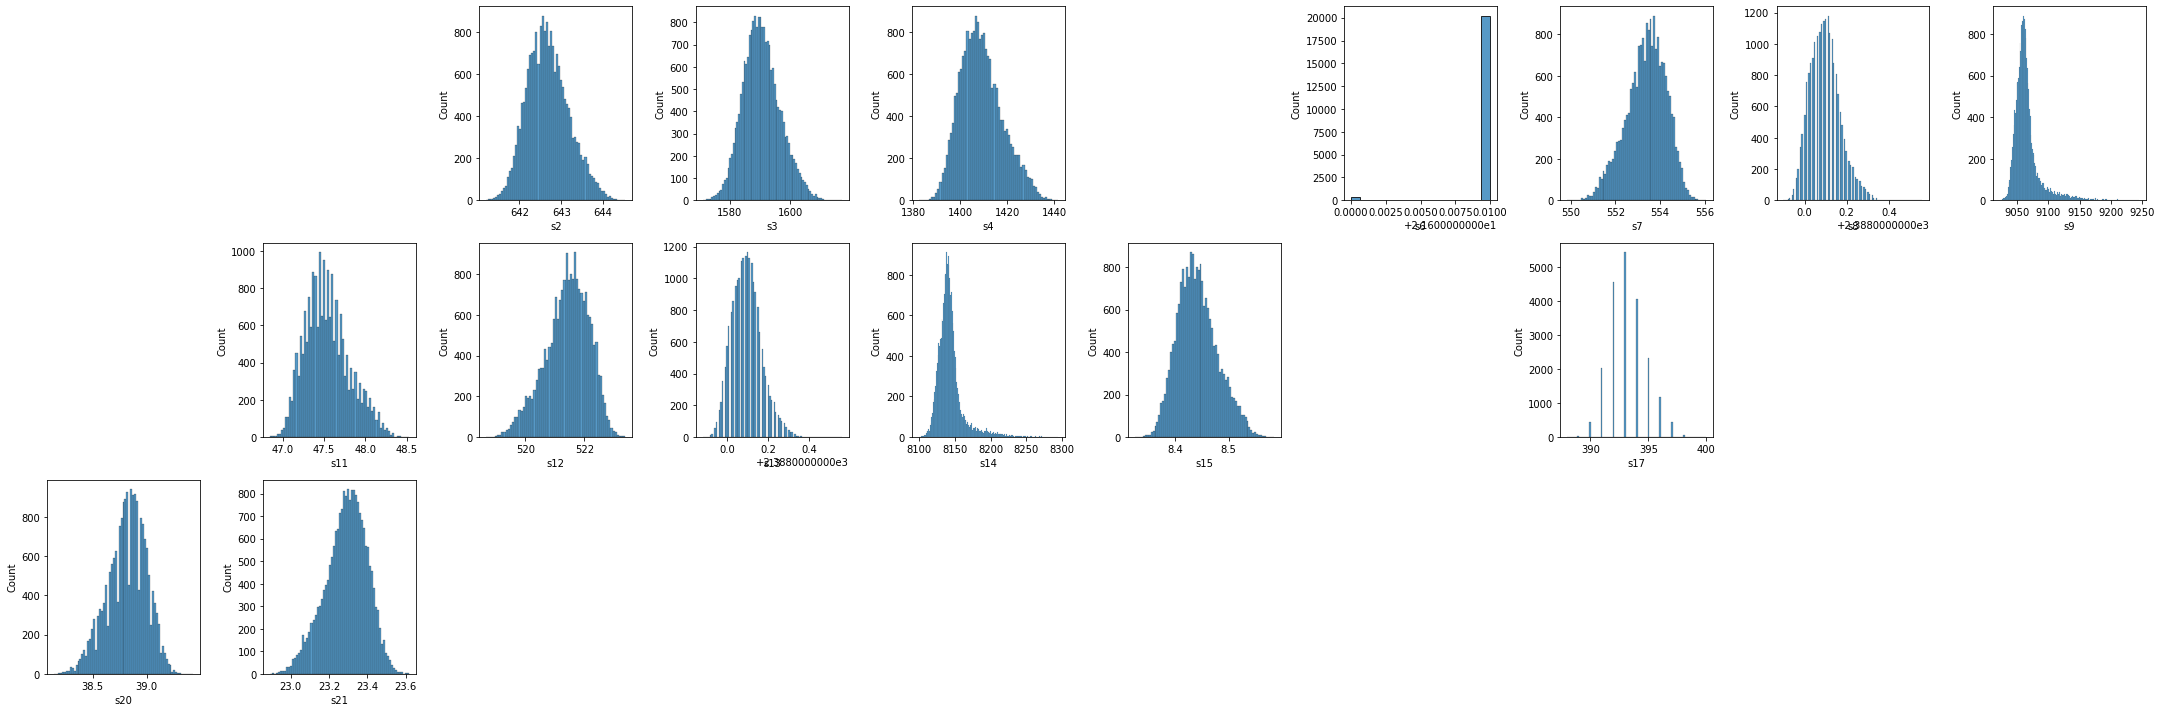

In [12]:
plotDataDistribution(train_df)

In [13]:
train_df

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [31]:
def scaleData(data, scaler=None):
    scaled_fields = setting_cols+sensor_cols
    if scaler == None:
        scaler = StandardScaler().fit(data[scaled_fields].values)
        # scaler = MinMaxScaler().fit(data[scaled_fields].values)
    scaled_data = scaler.transform(data[scaled_fields].values)
    scaled_df0 = pd.DataFrame(scaled_data)
    scaled_df0.columns = scaled_fields
    scaled_df1 = data.copy()
    for i in range(len(scaled_fields)):
        theField = scaled_fields[i]
        scaled_df1[theField] = scaled_df0[theField]
    return scaled_df1, scaler

In [32]:
scaled_train, scaler = scaleData(train_df)
scaled_train
scaled_test,scaler = scaleData(test_df)

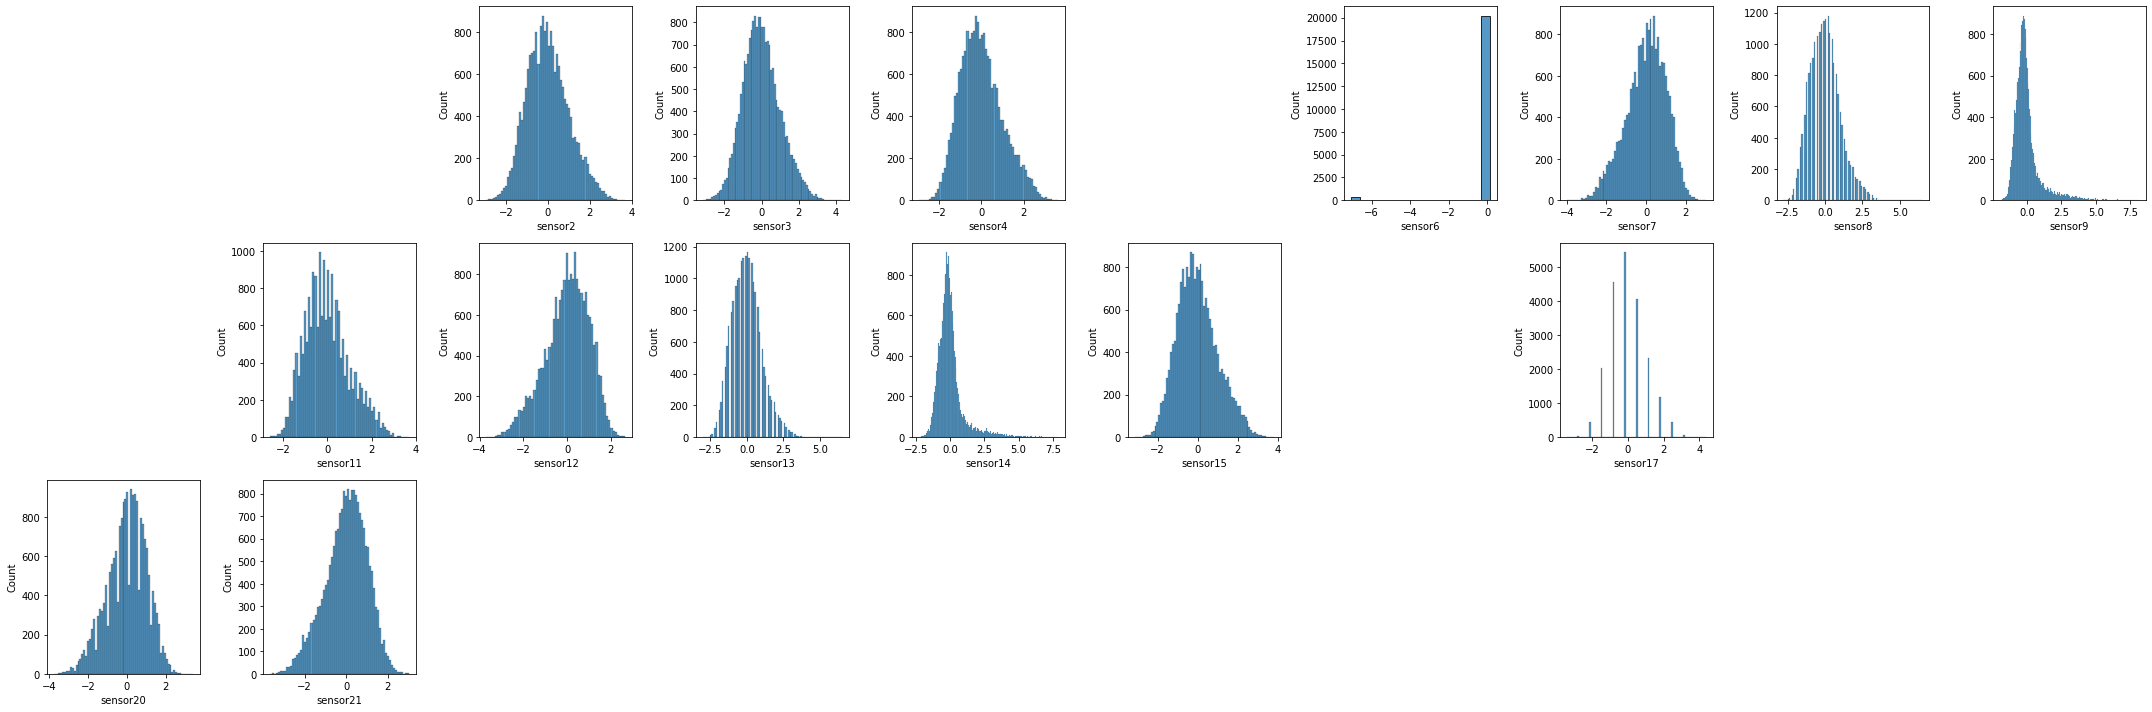

In [33]:
cols = plotDataDistribution(scaled_train)

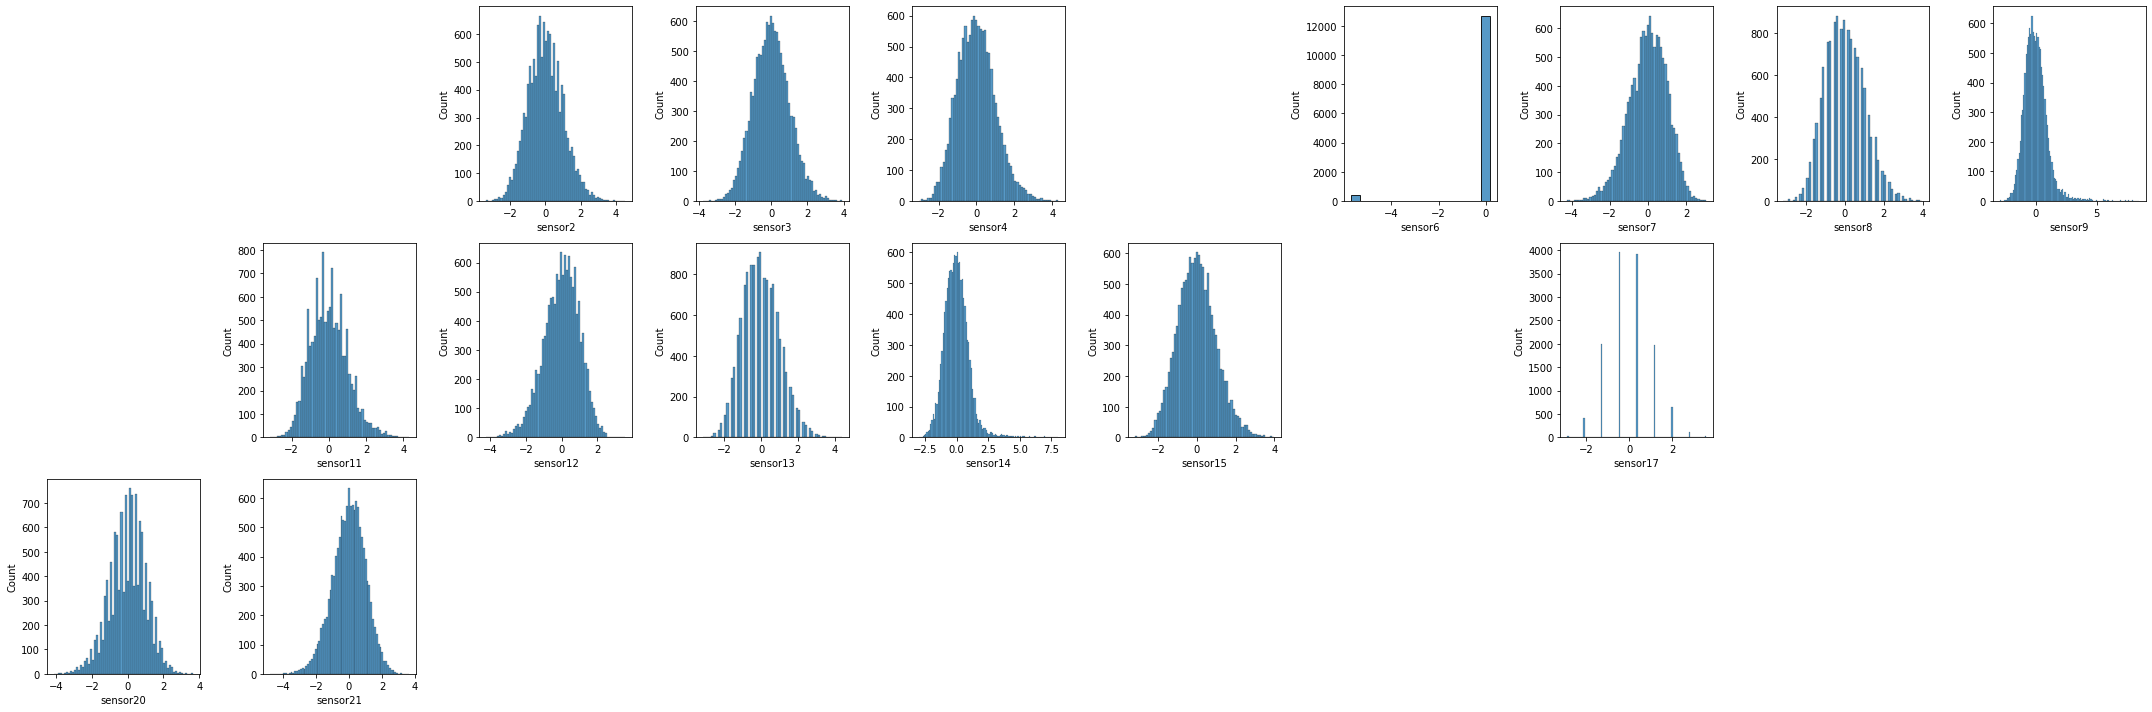

In [34]:
cols = plotDataDistribution(scaled_test)

In [36]:
import random
def getPieceWiseData(data, augmentStartCycle=None, augmentEndCycle=None, movingAverage=None):
    uniqueIds = data['id'].unique()
    if movingAverage==None:
        result = [data[data['id']==mId].values for mId in uniqueIds]
    else:
        result = [data[data['id']==mId].rolling(movingAverage).mean().dropna().values for mId in uniqueIds]
    maxlen = np.max([len(x) for x in result])
    #Augment the data now
    if(augmentStartCycle!=None and augmentEndCycle!= None):
        result1 = []
        for mc in result:
            maxCycle = len(mc)
            for i in range(50):
                idx = random.randint(max([maxCycle-145, 10]), max([maxCycle-10, 10]))
                if(len(mc[:idx, :])>0):
                    result1.append(mc[:idx, :])
            #Also add the complete sequence.
#             result1.append(mc)
        result = result1
    # calculate the ruls (-1) is the last column for RUL
    ruls = [min(mc[:, -1]) for mc in result]
    return result,ruls, maxlen
# Use this last one only (prev one is a helper)
from tensorflow.keras.preprocessing.sequence import pad_sequences
def getPaddedSequence(data, pad_type='pre', maxlen=None, augmentStartCycle=None, augmentEndCycle=None, movingAverage=None):
    piece_wise, ruls, ml = getPieceWiseData(data, augmentStartCycle, augmentEndCycle, movingAverage)
    if(maxlen==None): maxlen = ml
    padded_sequence = pad_sequences(piece_wise, padding=pad_type, maxlen=maxlen, dtype='float32')
    return padded_sequence, ruls, maxlen

In [37]:
augmentStartCycle = 130
augmentEndCycle = 362
maxlen=200
movingAverage = None
padded_train, train_ruls, maxlen = getPaddedSequence(scaled_train, maxlen=maxlen, augmentStartCycle=augmentStartCycle, augmentEndCycle=augmentEndCycle, movingAverage=movingAverage)
padded_test, test_ruls, maxlen = getPaddedSequence(scaled_test, maxlen=maxlen, movingAverage=movingAverage)

<AxesSubplot:ylabel='Count'>

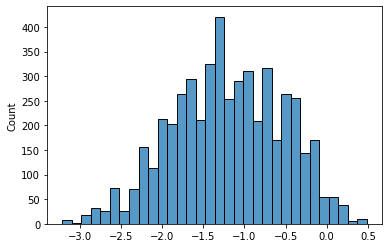

In [39]:
sns.histplot(train_ruls)

In [43]:
# selected_sensors = [7, 8, 9, 12, 16, 17, 20]
selected_sensors = [2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 15, 17, 20, 21]
# selected_sensors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
selected_sensors_indices = [x-1 for x in selected_sensors] # -1 because the index starts from 1

In [48]:
# X_train = padded_train[:, :, 5:26]
X_train = padded_train[:, :, 5:26][:, :, selected_sensors_indices]

In [49]:
# X_test = padded_test[:, :, 5:26]
X_test = padded_test[:, :, 5:26][:, :, selected_sensors_indices]

In [58]:
y_train = np.array(train_ruls).reshape(-1,1)
y_test = np.array(test_ruls).reshape(-1,1)

array([[-0.70398699],
       [-2.61163906],
       [-0.50721707],
       ...,
       [-1.26288748],
       [-2.35112677],
       [-1.26288748]])

In [60]:
numOfSensors = len(X_train[0][0])
setNumber = 0

In [61]:
from keras.models import Sequential
from keras.layers import Convolution1D
from keras.layers import MaxPooling1D
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout

In [62]:
def createCNNLSTMModel(inputShape):
    cv1 = Convolution1D(input_shape=inputShape, filters=18, kernel_size=2, strides=1, padding='same', activation='relu', name='cv1')
    mp1 = MaxPooling1D(pool_size=2, strides=2, padding='same', name = 'mp1')
    
    cv2 = Convolution1D(filters=36, kernel_size=2, strides=1, padding='same', activation='relu', name='cv2')
    mp2 = MaxPooling1D(pool_size=2, strides=2, padding='same', name= 'mp2')
    
    cv3 = Convolution1D(filters=72, kernel_size=2, strides=1, padding='same', activation='relu', name='cv3')
    mp3 = MaxPooling1D(pool_size=2, strides=2, padding='same', name= 'mp3')
    
    d4 = Dense(inputShape[0]*inputShape[1], activation='relu')
    do4 = Dropout(0.2)
    
    lstm5 = LSTM(inputShape[1]*3, return_sequences=True)
    do5 = Dropout(0.2)
    
    lstm6 = LSTM(inputShape[1]*3)
    do6 = Dropout(0.2)
    
    d7 = Dense(50, activation='relu')
    do7 = Dropout(0.2)
    
    dout = Dense(1)
    
    model = Sequential([cv1, mp1, cv2, mp2, cv3, mp3, d4, do4, lstm5, do5, lstm6, do6, d7, do7, dout])
    model.compile(optimizer='rmsprop', loss='mse')
    return model

In [63]:
model = createCNNLSTMModel((maxlen, numOfSensors))

In [64]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cv1 (Conv1D)                (None, 200, 18)           558       
                                                                 
 mp1 (MaxPooling1D)          (None, 100, 18)           0         
                                                                 
 cv2 (Conv1D)                (None, 100, 36)           1332      
                                                                 
 mp2 (MaxPooling1D)          (None, 50, 36)            0         
                                                                 
 cv3 (Conv1D)                (None, 50, 72)            5256      
                                                                 
 mp3 (MaxPooling1D)          (None, 25, 72)            0         
                                                                 
 dense_3 (Dense)             (None, 25, 3000)         

In [65]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.models import load_model
# ten fold
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3, shuffle=True)

from keras.models import load_model
msescores = []
counter= 0
for trainIdx, testIdx in kfold.split(X_train, y_train):
    counter = counter + 1
    # create callbacks
    model_path = 'best_model_set'+str(setNumber)+'fold'+str(counter)+'.h5'
    mc = ModelCheckpoint(model_path, monitor='val_loss', mode='min', verbose=1, save_best_only=True)
    es = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1)
    # create model
    # model = createModel(64, 64, 8, 8, (maxlen, numOfSensors))
    model = createCNNLSTMModel((maxlen, numOfSensors))
    model.fit(X_train[trainIdx], y_train[trainIdx], validation_data=(X_train[testIdx], y_train[testIdx]), batch_size=32, epochs=4, callbacks=[mc, es])
    # Done load the best model of this fold
    saved_model = load_model(model_path)
    msescores.append({'path': model_path, 'mse': saved_model.evaluate(X_train[testIdx], y_train[testIdx])})

Epoch 1/4
105/105 [==============================] - ETA: 0s - loss: 0.2177
Epoch 1: val_loss improved from inf to 0.09329, saving model to best_model_set0fold1.h5
105/105 [==============================] - 20s 61ms/step - loss: 0.2177 - val_loss: 0.0933
Epoch 2/4
104/105 [============================>.] - ETA: 0s - loss: 0.1381
Epoch 2: val_loss improved from 0.09329 to 0.08690, saving model to best_model_set0fold1.h5
105/105 [==============================] - 5s 45ms/step - loss: 0.1379 - val_loss: 0.0869
Epoch 3/4
103/105 [============================>.] - ETA: 0s - loss: 0.1256
Epoch 3: val_loss did not improve from 0.08690
105/105 [==============================] - 4s 35ms/step - loss: 0.1256 - val_loss: 0.0949
Epoch 4/4
105/105 [==============================] - ETA: 0s - loss: 0.1190
Epoch 4: val_loss improved from 0.08690 to 0.07893, saving model to best_model_set0fold1.h5
53/53 [==============================] - 2s 13ms/step - loss: 0.0789
Epoch 1/4
105/105 [==================

In [66]:
msescores

[{'path': 'best_model_set0fold1.h5', 'mse': 0.0789349153637886},
 {'path': 'best_model_set0fold2.h5', 'mse': 0.06904641538858414},
 {'path': 'best_model_set0fold3.h5', 'mse': 0.08029510825872421}]

In [67]:
for md in msescores:
    saved_model = load_model(md['path'])
    print(saved_model.evaluate(X_test, y_test))

4/4 [==============================] - 1s 96ms/step - loss: 0.4982
0.4982212483882904
4/4 [==============================] - 1s 10ms/step - loss: 0.3799
0.3798806667327881
4/4 [==============================] - 1s 46ms/step - loss: 0.3193
0.3192727863788605


In [68]:
predicted = saved_model.predict(X_test)

4/4 [==============================] - 1s 44ms/step


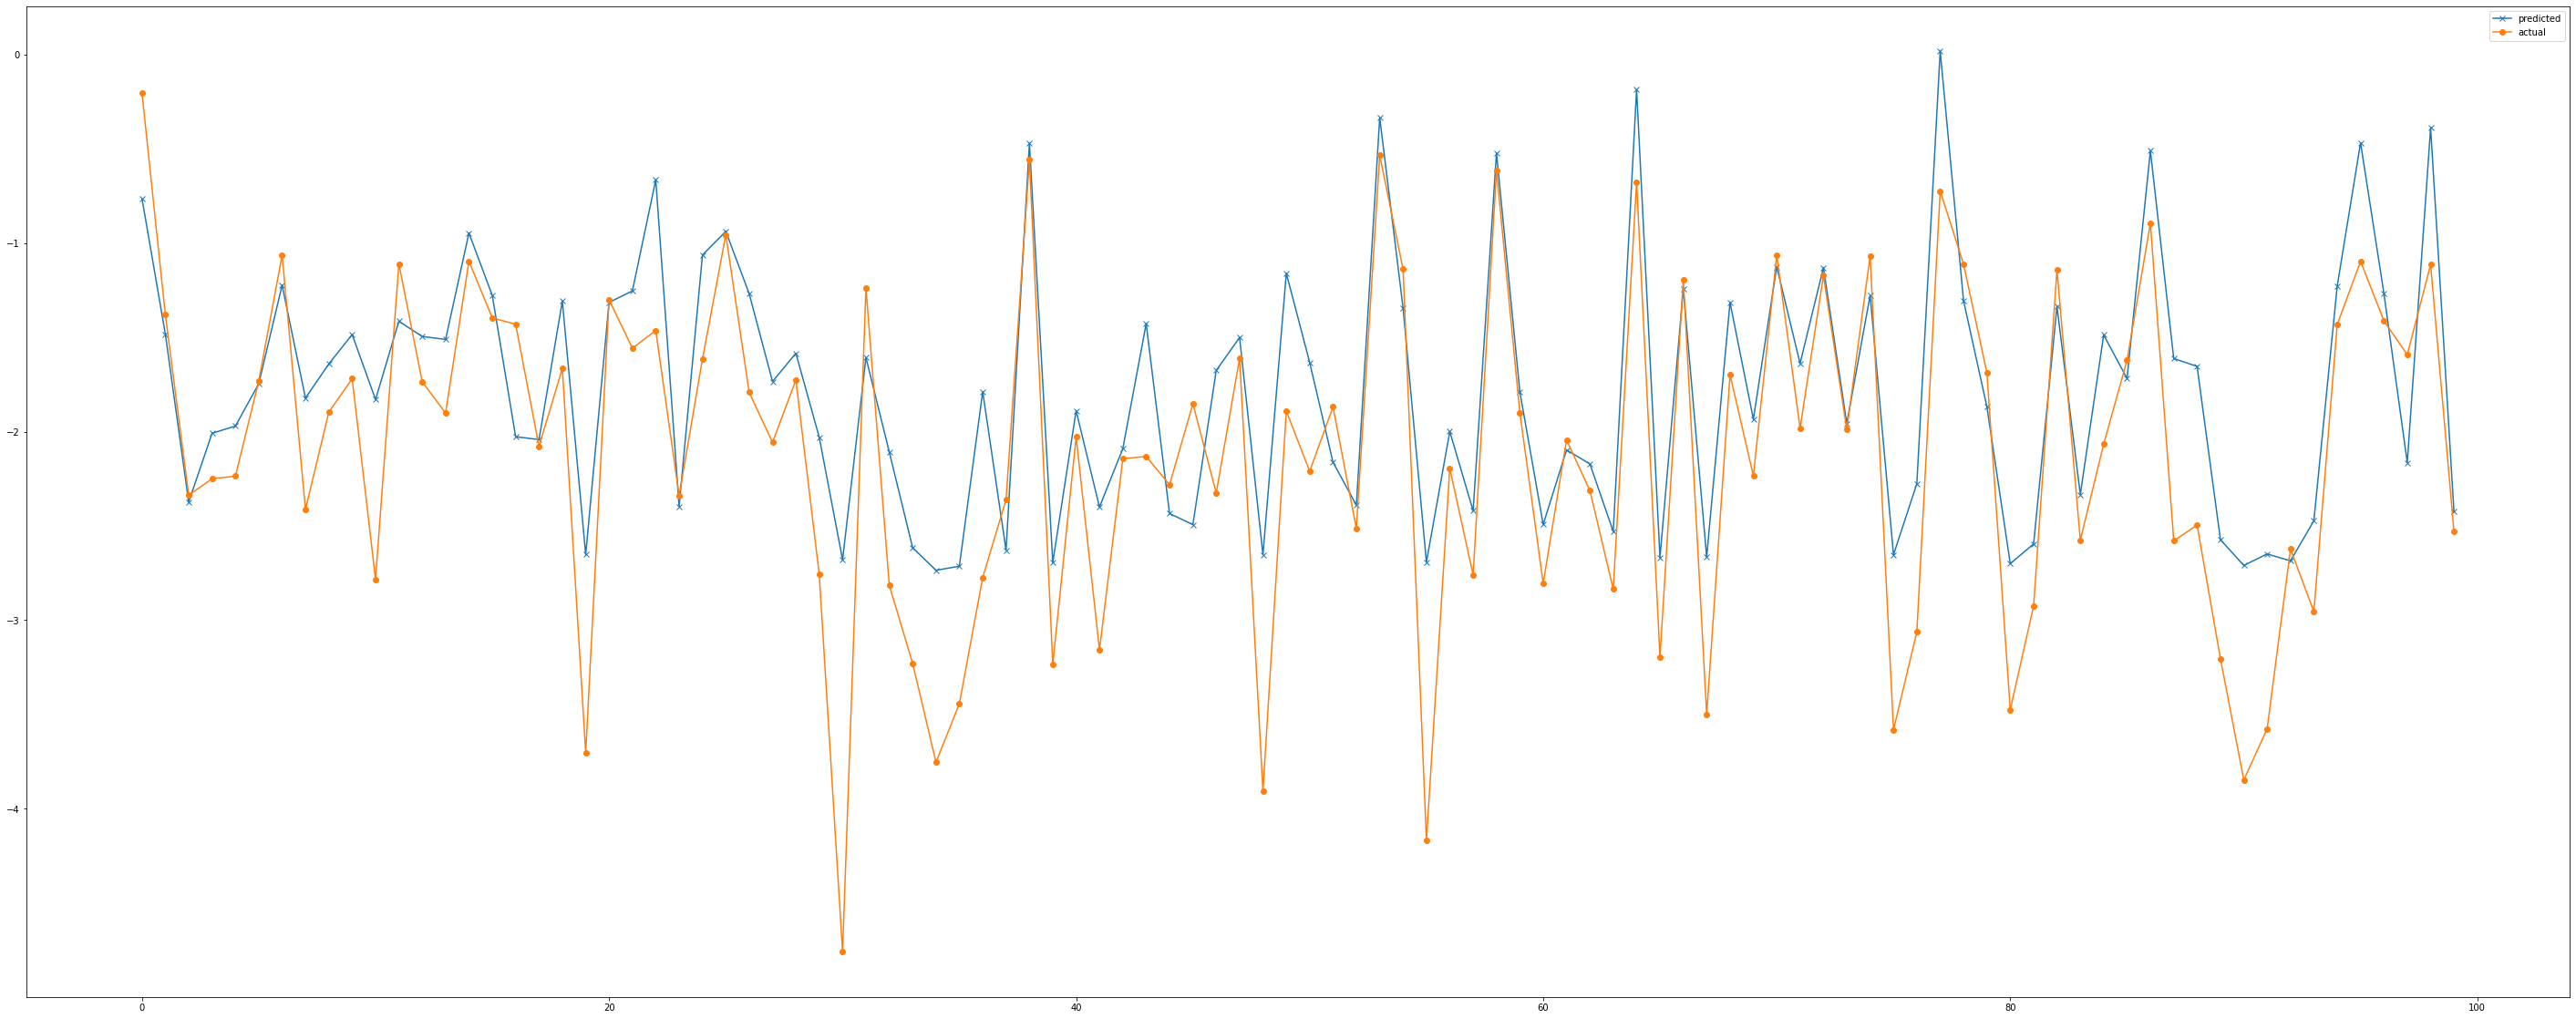

In [73]:
plt.figure(figsize=(50, 20))
plt.plot(range(len(predicted)), predicted, '-x', label='predicted')
plt.plot(range(len(y_test)), y_test, '-o', label='actual')
plt.legend()